In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
data=pd.read_csv('bajtrain.csv')
data.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,BAJAUTOFIN,332.70,344.9,332.70,343.10,45282
1,2010-01-05,BAJAUTOFIN,350.05,350.7,336.00,340.80,30972
2,2010-01-06,BAJAUTOFIN,341.00,351.0,335.20,345.70,18740
3,2010-01-07,BAJAUTOFIN,349.90,349.9,339.00,343.60,13493
4,2010-01-08,BAJAUTOFIN,344.10,359.0,342.45,349.85,30381


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1990 non-null   object 
 1   Symbol  1990 non-null   object 
 2   Open    1990 non-null   float64
 3   High    1990 non-null   float64
 4   Low     1990 non-null   float64
 5   Close   1990 non-null   float64
 6   Volume  1990 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 109.0+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1990 non-null   object 
 1   Symbol  1990 non-null   object 
 2   Open    1990 non-null   float64
 3   High    1990 non-null   float64
 4   Low     1990 non-null   float64
 5   Close   1990 non-null   float64
 6   Volume  1990 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 109.0+ KB


In [7]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1990, 1)

In [8]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [12]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 7s - loss: 4.6541e-05 - 7s/epoch - 211ms/step
Epoch 2/20
35/35 - 7s - loss: 4.5783e-05 - 7s/epoch - 202ms/step
Epoch 3/20
35/35 - 7s - loss: 4.6761e-05 - 7s/epoch - 210ms/step
Epoch 4/20
35/35 - 7s - loss: 4.0423e-05 - 7s/epoch - 198ms/step
Epoch 5/20
35/35 - 8s - loss: 4.5284e-05 - 8s/epoch - 219ms/step
Epoch 6/20
35/35 - 7s - loss: 3.8134e-05 - 7s/epoch - 202ms/step
Epoch 7/20
35/35 - 8s - loss: 4.0718e-05 - 8s/epoch - 227ms/step
Epoch 8/20
35/35 - 7s - loss: 4.4008e-05 - 7s/epoch - 203ms/step
Epoch 9/20
35/35 - 8s - loss: 5.1849e-05 - 8s/epoch - 229ms/step
Epoch 10/20
35/35 - 7s - loss: 6.6269e-05 - 7s/epoch - 208ms/step
Epoch 11/20
35/35 - 8s - loss: 3.9649e-05 - 8s/epoch - 227ms/step
Epoch 12/20
35/35 - 7s - loss: 3.7209e-05 - 7s/epoch - 205ms/step
Epoch 13/20
35/35 - 7s - loss: 3.3661e-05 - 7s/epoch - 210ms/step
Epoch 14/20
35/35 - 7s - loss: 3.5281e-05 - 7s/epoch - 210ms/step
Epoch 15/20
35/35 - 7s - loss: 3.1356e-05 - 7s/epoch - 202ms/step
Epoch 16/20
35/35 -

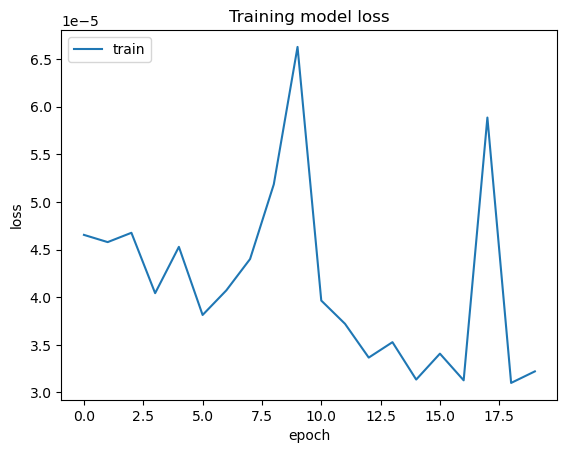

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [14]:
testData = pd.read_csv('bajtest.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1179, 60, 1)

In [16]:
y_pred=model.predict(X_test)
y_pred

37/37 [==============================] - 6s 93ms/step


array([[0.12968472],
       [0.13094027],
       [0.13259946],
       ...,
       [0.625368  ],
       [0.62216896],
       [0.6195298 ]], dtype=float32)

In [17]:
predicted_price=sc.inverse_transform(y_pred)

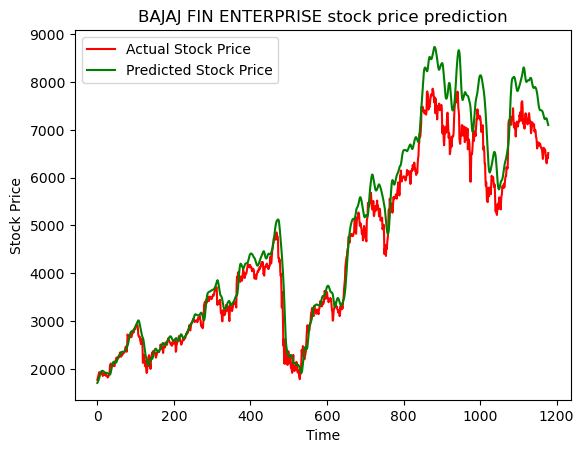

In [19]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('BAJAJ FIN ENTERPRISE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()